In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.preprocessing import image
import pathlib
import pickle
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive






Data Preprocessing


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/SportsDataset")
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
sample_submission.csv  test.csv    train      train_split
test		       test_split  train.csv  valid_split


In [ ]:
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('/content/drive/MyDrive/Colab Notebooks/SportsDataset')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content/drive/.shortcut-targets-by-id/1rwLP-dsvXYHsT00ME-h8FcqiWONZKD2K/SportsDataset
Current working directory: /content/drive/.shortcut-targets-by-id/1rwLP-dsvXYHsT00ME-h8FcqiWONZKD2K/SportsDataset


In [3]:
Image_size=[224,224]
train_path='/content/drive/MyDrive/Colab Notebooks/SportsDataset/train'
#valid_path='/content/drive/MyDrive/Colab Notebooks/dataset/valid'
test_path='/content/drive/MyDrive/Colab Notebooks/SportsDataset/test'
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SportsDataset/train.csv')


In [ ]:
#splitting data into train and valid set

train_set=df.sample(frac=0.8,random_state=25)
valid_set=df.drop(train_set.index)
# print(len(valid_set))

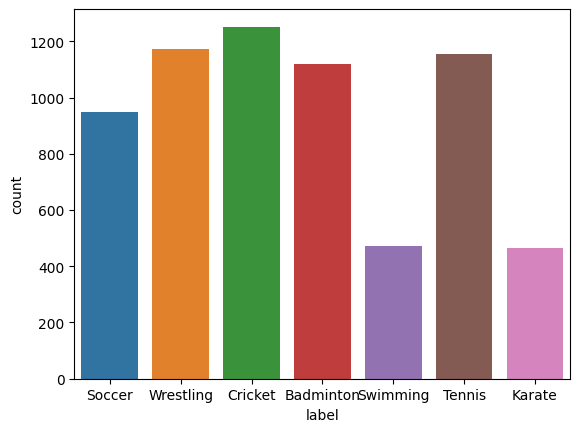

In [ ]:
import seaborn as sns
sns.countplot(data=train_set,x="label");

<Axes: xlabel='label', ylabel='count'>

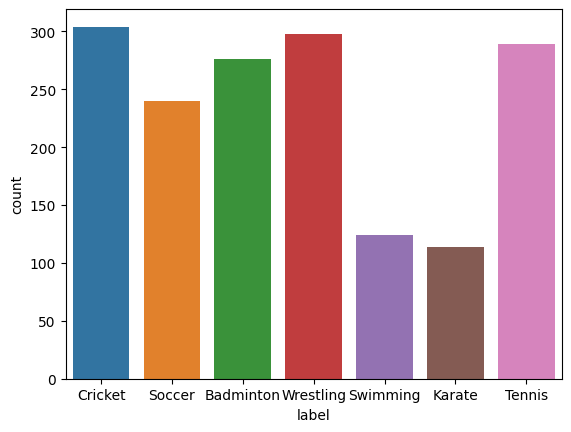

In [ ]:
sns.countplot(data=valid_set,x='label')

In [4]:
all_labels=df['label']
labels=list(all_labels.unique())
labels

['Badminton', 'Cricket', 'Tennis', 'Swimming', 'Soccer', 'Wrestling', 'Karate']

In [5]:
label_to_id={}
id_to_label={}
j = 0
for i in labels:
  label_to_id[i] = j
  id_to_label[j] = i
  j += 1
print(label_to_id)
print(id_to_label)

{'Badminton': 0, 'Cricket': 1, 'Tennis': 2, 'Swimming': 3, 'Soccer': 4, 'Wrestling': 5, 'Karate': 6}
{0: 'Badminton', 1: 'Cricket', 2: 'Tennis', 3: 'Swimming', 4: 'Soccer', 5: 'Wrestling', 6: 'Karate'}


In [6]:
label_id = []
for i in all_labels:
  label_id.append(label_to_id[i])
print(label_id)

[0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 1, 4, 0, 0, 0, 0, 1, 5, 2, 0, 4, 5, 1, 0, 2, 2, 0, 2, 1, 3, 3, 5, 1, 5, 5, 1, 6, 3, 2, 0, 1, 5, 1, 4, 2, 5, 0, 1, 0, 1, 4, 2, 0, 2, 1, 2, 0, 3, 5, 1, 6, 1, 0, 2, 1, 3, 1, 5, 5, 0, 0, 0, 5, 6, 1, 3, 0, 0, 5, 4, 4, 4, 3, 1, 0, 6, 1, 0, 6, 6, 0, 6, 1, 0, 0, 1, 4, 1, 5, 1, 0, 2, 2, 1, 4, 4, 1, 0, 2, 5, 0, 2, 4, 3, 5, 2, 2, 5, 0, 1, 5, 0, 6, 4, 1, 1, 5, 0, 6, 5, 0, 0, 0, 5, 2, 3, 4, 5, 6, 0, 0, 3, 1, 6, 5, 0, 5, 4, 5, 4, 1, 0, 1, 1, 3, 4, 2, 5, 1, 2, 1, 0, 1, 6, 2, 5, 0, 0, 4, 1, 6, 2, 0, 5, 5, 5, 2, 4, 1, 5, 0, 0, 2, 0, 2, 2, 2, 1, 6, 6, 1, 1, 1, 2, 0, 5, 1, 4, 3, 5, 6, 2, 1, 2, 5, 1, 0, 0, 2, 4, 3, 0, 1, 5, 4, 2, 2, 3, 3, 0, 2, 2, 5, 2, 2, 1, 4, 2, 0, 0, 6, 5, 0, 0, 2, 3, 0, 4, 1, 2, 0, 1, 4, 0, 5, 1, 2, 1, 4, 5, 1, 2, 2, 0, 0, 0, 6, 0, 4, 2, 0, 2, 1, 2, 1, 6, 0, 2, 1, 1, 3, 5, 2, 2, 0, 4, 1, 5, 3, 1, 4, 1, 0, 5, 5, 6, 5, 0, 2, 6, 0, 1, 6, 1, 5, 1, 4, 0, 1, 1, 0, 5, 5, 1, 6, 2, 1, 2, 2, 0, 5, 6, 1, 2, 5, 3, 5, 6, 6, 5, 2, 4, 1, 4, 1, 4, 5, 2, 1, 2, 4, 5, 1, 

In [ ]:
root_dir='/content/drive/MyDrive/Colab Notebooks/SportsDataset/'
for i in labels:
 os.makedirs(root_dir+'/train_split/'+i)
 os.makedirs(root_dir+'/valid_split/'+i)

os.chdir("/content/drive/My Drive/Colab Notebooks/SportsDataset/")
!ls

sample_submission.csv  test.csv  train.csv    valid_split
test		       train	 train_split


In [ ]:
# Segregating data based on its labels in train and valid folders

root_dir='/content/drive/MyDrive/Colab Notebooks/SportsDataset/'

count=0
import shutil

for index,rows in train_set.iterrows():

  src=train_path+'/'+rows['image_ID']
  dest=root_dir+'train_split'+'/'+rows['label']+'/'+rows['image_ID']
  if os.path.isfile(src)==True and os.path.isfile(dest)==False :
    count=count+1
    shutil.copy(src,dest)
print(count)

for index,rows in valid_set.iterrows():
  src=train_path+'/'+rows['image_ID']

  dest=root_dir+'valid_split'+'/'+rows['label']+'/'+rows['image_ID']
  if os.path.isfile(src)==True and os.path.isfile(dest)==False:
    count=count+1
    shutil.copy(src,dest)
print(count)


6582
8227


Images to Array

In [7]:
# Train data
from os import listdir
from PIL import Image
directory='/content/drive/MyDrive/Colab Notebooks/SportsDataset/train_split/'
train_data=[]
train_label=[]
y_train=[]
for label in labels:
  curr_dir=directory+label+'/'
  #print(curr_dir)
  for image_file in os.listdir(curr_dir):
    if image_file.endswith('.jpg'):
    
      image=Image.open(curr_dir+image_file).convert('L')
      image=image.resize((150,150))
      image_array=np.array(image).flatten()
      train_data.append(image_array)
      train_label.append(label)
      y_train.append(label_to_id[label])
train_data=np.array(train_data)
train_label=np.array(train_label)
print(len(train_data))



6582


In [8]:
#Validation set
directory='/content/drive/MyDrive/Colab Notebooks/SportsDataset/valid_split/'
valid_data=[]
valid_label=[]
y_test=[]
for label in labels:
  curr_dir=directory+label+'/'
  #print(len(os.listdir(curr_dir)))
  for image_file in os.listdir(curr_dir):
    if image_file.endswith('.jpg'):
    
      image=Image.open(curr_dir+image_file).convert('L')
      image=image.resize((150,150))
      image_array=np.array(image).flatten()
      valid_data.append(image_array)
      valid_label.append(label)
      y_test.append(label_to_id[label])
valid_data=np.array(valid_data)
valid_label=np.array(valid_label)
print(len(valid_data))
print(len(valid_label))
print(len(y_test))

1645
1645
1645


In [ ]:
print(len(valid_data))
print(len(train_data))

1640
6582


Model Building

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(train_data)
x_test=scaler.fit_transform(valid_data)
lr=LogisticRegression()
lr.fit(x_train,train_label)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lr=lr.predict(x_test)
print(f"Accuracy  :{accuracy_score(y_pred_lr,valid_label)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred_lr,valid_label,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred_lr,valid_label,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred_lr,valid_label,average='weighted')*100}% ") 
cm = metrics.classification_report(y_pred_lr, valid_label)


In [ ]:
print(cm)

## Decision Tree

In [ ]:
# train_data=train_data/225
# valid_data=valid_data/225
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(train_data)
x_test=scaler.fit_transform(valid_data)
dt=DecisionTreeClassifier(max_depth=14)
dt.fit(x_train,train_label)


DecisionTreeClassifier(max_depth=14)

In [ ]:
# Training accuracy
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
y_pred_dt=dt.predict(x_train)
print(f"Accuracy  :{accuracy_score(y_pred_dt,train_label)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred_dt,train_label,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred_dt,train_label,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred_dt,train_label,average='weighted')*100}% ") 
cm = metrics.classification_report(y_pred_dt, train_label)

Accuracy  :89.19781221513217%
F1 Score  :89.15419838539428% 
Precision :89.24447348823497% 
Recall    :89.19781221513217% 


In [ ]:
print(cm)

              precision    recall  f1-score   support

   Badminton       0.90      0.87      0.89      1155
     Cricket       0.91      0.93      0.92      1220
      Karate       0.80      0.90      0.85       408
      Soccer       0.88      0.83      0.85      1012
    Swimming       0.79      0.80      0.80       461
      Tennis       0.90      0.86      0.88      1217
   Wrestling       0.94      1.00      0.97      1109

    accuracy                           0.89      6582
   macro avg       0.87      0.88      0.88      6582
weighted avg       0.89      0.89      0.89      6582



In [ ]:
# Test Accuracy
y_pred_dt=dt.predict(x_test)
print(f"Accuracy  :{accuracy_score(y_pred_dt,valid_label)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred_dt,valid_label,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred_dt,valid_label,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred_dt,valid_label,average='weighted')*100}% ") 
cm = metrics.classification_report(y_pred_dt, valid_label)

Accuracy  :45.653495440729486%
F1 Score  :45.6500428946097% 
Precision :45.71962747443866% 
Recall    :45.653495440729486% 


In [ ]:
print(cm)

              precision    recall  f1-score   support

   Badminton       0.47      0.45      0.46       294
     Cricket       0.47      0.49      0.48       295
      Karate       0.26      0.29      0.28       104
      Soccer       0.45      0.41      0.43       264
    Swimming       0.34      0.34      0.34       124
      Tennis       0.43      0.45      0.44       277
   Wrestling       0.57      0.60      0.58       287

    accuracy                           0.46      1645
   macro avg       0.43      0.43      0.43      1645
weighted avg       0.46      0.46      0.46      1645



##Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [ ]:
# Create a Random Forest classifier
rf_model= RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_model.fit(train_data, train_label)

# Predict on the test set
y_pred = rf_model.predict(valid_data)


In [ ]:
print(f"Accuracy  :{accuracy_score(y_pred,valid_label)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred,valid_label,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred,valid_label,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred,valid_label,average='weighted')*100}% ") 
cm = metrics.classification_report(y_pred, valid_label)

Accuracy  :67.23404255319149%
F1 Score  :67.53862078193458% 
Precision :69.0034792233013% 
Recall    :67.23404255319149% 


In [ ]:
print(cm)

              precision    recall  f1-score   support

   Badminton       0.67      0.72      0.69       256
     Cricket       0.76      0.59      0.66       391
      Karate       0.43      0.75      0.55        65
      Soccer       0.62      0.66      0.64       226
    Swimming       0.55      0.75      0.63        91
      Tennis       0.64      0.65      0.65       284
   Wrestling       0.81      0.72      0.76       332

    accuracy                           0.67      1645
   macro avg       0.64      0.69      0.65      1645
weighted avg       0.69      0.67      0.68      1645



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(train_data,train_label)
#print(valid_data)
y_pred_knn=knn.predict(valid_data)

In [ ]:
print(f"Accuracy  :{accuracy_score(y_pred_knn,valid_label)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred_knn,valid_label,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred_knn,valid_label,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred_knn,valid_label,average='weighted')*100}% ") 
cm = metrics.classification_report(y_pred_knn, valid_label)

Accuracy  :26.62613981762918%
F1 Score  :30.34482649956952% 
Precision :44.8343422706785% 
Recall    :26.62613981762918% 


In [ ]:
print(cm)


              precision    recall  f1-score   support

   Badminton       0.48      0.33      0.39       398
     Cricket       0.17      0.33      0.23       157
      Karate       0.11      0.28      0.16        46
      Soccer       0.21      0.28      0.24       176
    Swimming       0.08      0.21      0.12        47
      Tennis       0.59      0.21      0.31       801
   Wrestling       0.03      0.50      0.06        20

    accuracy                           0.27      1645
   macro avg       0.24      0.31      0.22      1645
weighted avg       0.45      0.27      0.30      1645



## SVM

In [10]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
#param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svm_model=svm.SVC()
svm_model.fit(train_data,train_label)

SVC()

In [11]:
y_pred_svm=svm_model.predict(valid_data)
print(f"Accuracy  :{accuracy_score(y_pred_svm,valid_label)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred_svm,valid_label,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred_svm,valid_label,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred_svm,valid_label,average='weighted')*100}% ") 
cm = metrics.classification_report(y_pred_svm, valid_label)

Accuracy  :56.35258358662614%
F1 Score  :56.966723915397125% 
Precision :58.41992711701275% 
Recall    :56.35258358662614% 


In [12]:
print(cm)

              precision    recall  f1-score   support

   Badminton       0.56      0.53      0.54       295
     Cricket       0.59      0.54      0.56       334
      Karate       0.39      0.62      0.48        71
      Soccer       0.48      0.56      0.52       205
    Swimming       0.35      0.49      0.41        88
      Tennis       0.54      0.55      0.55       287
   Wrestling       0.79      0.64      0.71       365

    accuracy                           0.56      1645
   macro avg       0.53      0.56      0.54      1645
weighted avg       0.58      0.56      0.57      1645



## TUNED SVC

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls 
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0

In [ ]:

!nvcc --version


In [ ]:
!pip install thundersvm

In [ ]:
from sklearn import svm
# from sklearn.svm import SVC
from thundersvm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


param_r={
    'C':[0.1,1,10,100,150,500,1000],
    'kernel':['rbf','polynomial']   
}

tuned_svm=SVC(verbose=3)
random_search=RandomizedSearchCV(tuned_svm, param_r,scoring='accuracy', n_iter=5, cv=5, random_state=42)

random_search.fit(train_data,y_train)
print(random_search.best_params_)


{'kernel': 'polynomial', 'C': 150}


In [ ]:
svm_model=SVC(verbose=True,kernel='polynomial',C=150)
svm_model.fit(train_data,y_train)

SVC(C=150, class_weight={}, kernel='polynomial', verbose=True)

In [ ]:
y_pred_svm=svm_model.predict(valid_data)
print(f"Accuracy  :{accuracy_score(y_pred_svm,y_test)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred_svm,y_test,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred_svm,y_test,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred_svm,y_test,average='weighted')*100}% ") 
cm = metrics.classification_report(y_pred_svm, y_test)
print(cm)

Accuracy  :61.45896656534955%
F1 Score  :61.336299371515814% 
Precision :61.79564410854581% 
Recall    :61.45896656534955% 
              precision    recall  f1-score   support

         0.0       0.63      0.56      0.59       307
         1.0       0.64      0.57      0.61       342
         2.0       0.66      0.60      0.63       321
         3.0       0.59      0.56      0.57       130
         4.0       0.56      0.66      0.60       204
         5.0       0.64      0.79      0.71       241
         6.0       0.47      0.54      0.50       100

    accuracy                           0.61      1645
   macro avg       0.60      0.61      0.60      1645
weighted avg       0.62      0.61      0.61      1645



##XGBoost

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
xgboostModel=XGBClassifier()
xgboostModel.fit(train_data,y_train)

y_pred = xgboostModel.predict(valid_data)

print(f"Accuracy  :{accuracy_score(y_pred,y_test)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred,y_test,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred,y_test,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred,y_test,average='weighted')*100}% ") 

print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy  :67.96352583586625%
F1 Score  :68.15837135064677% 
Precision :68.95106811077083% 
Recall    :67.96352583586625% 
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       276
           1       0.64      0.70      0.67       304
           2       0.64      0.64      0.64       289
           3       0.74      0.56      0.64       124
           4       0.64      0.70      0.67       240
           5       0.77      0.82      0.80       298
           6       0.78      0.47      0.59       114

    accuracy                           0.68      1645
   macro avg       0.70      0.65      0.67      1645
weighted avg       0.68      0.68      0.68      1645



In [14]:
#Training accuracy
y_pred_train = xgboostModel.predict(train_data)

print(f"Accuracy  :{accuracy_score(y_pred_train,y_train)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred_train,y_train,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred_train,y_train,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred_train,y_train,average='weighted')*100}% ") 

print("Classification Report")
print(classification_report(y_train, y_pred_train))

Accuracy  :100.0%
F1 Score  :100.0% 
Precision :100.0% 
Recall    :100.0% 
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00      1252
           2       1.00      1.00      1.00      1156
           3       1.00      1.00      1.00       471
           4       1.00      1.00      1.00       948
           5       1.00      1.00      1.00      1173
           6       1.00      1.00      1.00       464

    accuracy                           1.00      6582
   macro avg       1.00      1.00      1.00      6582
weighted avg       1.00      1.00      1.00      6582



In [ ]:
!pip install xgboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

params={
    'learning_rate':[0.05,0.10,0.15,0.20,0.25],
    'max_depth':[ 3, 4, 5, 6],
    'n_estimators':[20,25,30,35,40,45,50]
}
classifier = XGBClassifier()
rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',cv=5,verbose=3)
rs_model.fit(train_data,y_train)
print(rs_model.best_estimator_)


In [ ]:
classifier=XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              enable_categorical=False,
              learning_rate=0.2,max_depth=4,
              max_leaves=None,
              min_child_weight=3,
              n_estimators=50,
              objective='multi:softprob', predictor=None)

In [ ]:
classifier.fit(train_data,y_train)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
#Training accuracy
y_pred = classifier.predict(train_data)

print(f"Accuracy  :{accuracy_score(y_pred,y_train)*100}%") 
print("Classification Report for training set")
print(classification_report(y_train, y_pred))

Accuracy  :94.30264357338196%
Classification Report for training set
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1118
           1       0.93      0.94      0.93      1252
           2       0.92      0.93      0.93      1156
           3       0.95      0.94      0.95       471
           4       0.95      0.92      0.93       948
           5       0.95      0.97      0.96      1173
           6       1.00      0.94      0.97       464

    accuracy                           0.94      6582
   macro avg       0.95      0.94      0.95      6582
weighted avg       0.94      0.94      0.94      6582



In [ ]:
#Testing accuracy
y_pred = classifier.predict(valid_data)

print(f"Accuracy  :{accuracy_score(y_pred,y_test)*100}%") 
print(f"F1 Score  :{metrics.f1_score(y_pred,y_test,average='weighted')*100}% ") 
print(f"Precision :{metrics.precision_score(y_pred,y_test,average='weighted')*100}% ") 
print(f"Recall    :{metrics.recall_score(y_pred,y_test,average='weighted')*100}% ") 

print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy  :59.20972644376899%
F1 Score  :59.4739879533013% 
Precision :60.393126661340155% 
Recall    :59.20972644376899% 
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.60      0.60       276
           1       0.52      0.59      0.55       304
           2       0.56      0.58      0.57       289
           3       0.59      0.47      0.52       124
           4       0.56      0.55      0.56       240
           5       0.68      0.76      0.72       298
           6       0.73      0.39      0.51       114

    accuracy                           0.59      1645
   macro avg       0.61      0.56      0.58      1645
weighted avg       0.60      0.59      0.59      1645



##Comparison

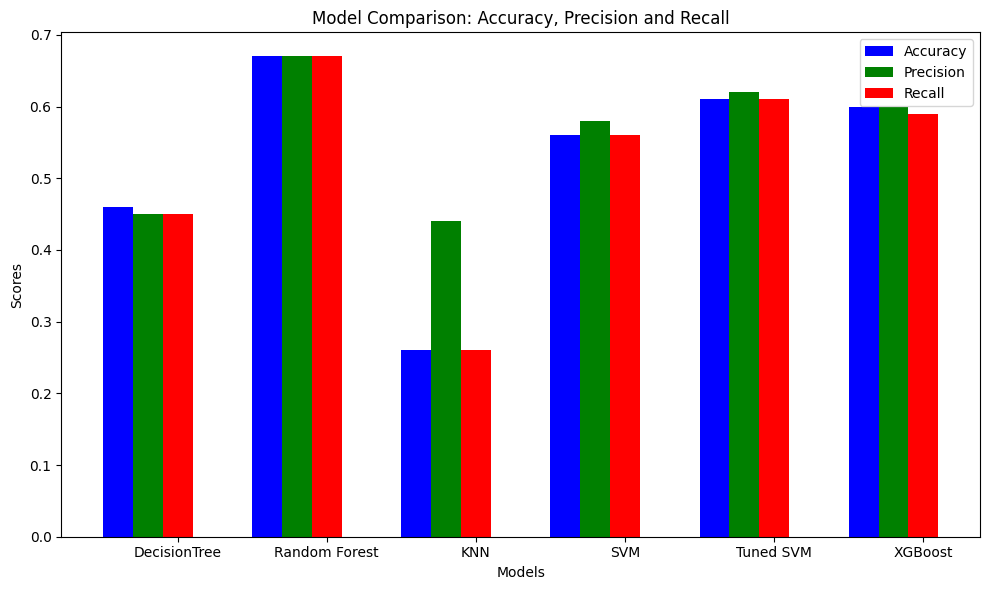

In [15]:
import numpy as np
import matplotlib.pyplot as plt

model_names = ['DecisionTree','Random Forest','KNN','SVM','Tuned SVM','XGBoost']
accuracy_scores = [0.46,0.67,0.26,0.56,0.61,0.60]
precision_scores = [0.45,0.67,0.44,0.58,0.62,0.60]
recall_scores = [0.45,0.67,0.26,0.56,0.61,0.59]
bar_width = 0.2
bar_positions = np.arange(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(bar_positions, accuracy_scores, color='b', width=bar_width, label='Accuracy')
plt.bar(bar_positions + bar_width, precision_scores, color='g', width=bar_width, label='Precision')
plt.bar(bar_positions + 2 * bar_width, recall_scores, color='r', width=bar_width, label='Recall')

plt.xticks(bar_positions + 2 * bar_width, model_names)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Accuracy, Precision and Recall')
plt.legend()

plt.tight_layout()
plt.show()